In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr
from source2 import *
#from source2 import *
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import datetime

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
p = "/Users/jenifervivar/Desktop/NERTO_2022/Lidar_Data/Vertical_data"

In [4]:
#data from the 10th to the 31st
p= "/Users/jenifervivar/Desktop/HALO_DATA/May_2022HALO_data/BLHStats_202205.nc"

data = xr.open_dataset(p)
df_pbl = data.to_dataframe()
df_pbl.head()

version        yDay  latitude  longitude  Height  lowHeight  \
year Ncols                                                                
0    0          2.3  130.006944   39.9929  -105.2614     NaN        NaN   
     1          2.3  130.020833   39.9929  -105.2614     NaN        NaN   
     2          2.3  130.034722   39.9929  -105.2614     NaN        NaN   
     3          2.3  130.048611   39.9929  -105.2614     NaN        NaN   
     4          2.3  130.062500   39.9929  -105.2614     NaN        NaN   

            highHeight  QCFlag  cloudBase  precip  
year Ncols                                         
0    0             NaN     0.0        NaN     0.0  
     1             NaN     0.0        NaN     0.0  
     2             NaN     0.0        NaN     0.0  
     3             NaN     0.0        NaN     0.0  
     4             NaN     0.0        NaN     0.0

In [5]:
df_pbl["yDay"] =  pd.to_datetime(df_pbl['yDay'], unit='D', origin=pd.Timestamp('2022-01-01'))
df_pbl.head()

version                          yDay  latitude  longitude  \
year Ncols                                                               
0    0          2.3 2022-05-11 00:10:00.000004352   39.9929  -105.2614   
     1          2.3 2022-05-11 00:30:00.000003328   39.9929  -105.2614   
     2          2.3 2022-05-11 00:50:00.000002304   39.9929  -105.2614   
     3          2.3 2022-05-11 01:10:00.000001024   39.9929  -105.2614   
     4          2.3 2022-05-11 01:30:00.000000000   39.9929  -105.2614   

            Height  lowHeight  highHeight  QCFlag  cloudBase  precip  
year Ncols                                                            
0    0         NaN        NaN         NaN     0.0        NaN     0.0  
     1         NaN        NaN         NaN     0.0        NaN     0.0  
     2         NaN        NaN         NaN     0.0        NaN     0.0  
     3         NaN        NaN         NaN     0.0        NaN     0.0  
     4         NaN        NaN         NaN     0.0        NaN     0.0

In [6]:
df_pbl.isna().sum()

version         0
yDay            0
latitude        0
longitude       0
Height         48
lowHeight      48
highHeight     54
QCFlag          0
cloudBase     637
precip          0
dtype: int64

In [7]:
len(df_pbl)

1584

In [8]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


In [18]:
p3 = "/Users/jenifervivar/Desktop/HALO_DATA/may 2022_level1_data/"
DF_=pd.DataFrame()
for file in sorted(os.listdir(p3)):
    ds = xr.open_mfdataset(p3+file)
    df = ds.to_dataframe()
    #print(df.time_offset)
    df.set_index(keys=['yDay','range'], inplace=True)
    print(df.groupby(pd.Grouper(freq='1H', level=0)).mean())
    #print(df.resample('1H'))
    break

                             velocity  snr      beta        sw  intensity  \
yDay                                                                        
130 days 15:06:51.239980800  1.136347  NaN  0.000003  5.615806   1.013494   
130 days 16:06:51.239980800  1.228292  NaN  0.000003  5.585397   1.013108   
130 days 17:06:51.239980800  1.224870  NaN  0.000003  5.582971   1.012715   
130 days 18:06:51.239980800  1.251918  NaN  0.000003  5.553604   1.012990   
130 days 19:06:51.239980800  1.072623  NaN  0.000003  5.539660   1.014887   
130 days 20:06:51.239980800  1.151424  NaN  0.000003  5.548964   1.017322   
130 days 21:06:51.239980800  1.118044  NaN  0.000003  5.538831   1.016125   
130 days 22:06:51.239980800  1.182353  NaN  0.000003  5.511013   1.016299   
130 days 23:06:51.239980800  1.391591  NaN  0.000003  5.498576   1.015648   

                                azimuth  elevation  scanType  
yDay                                                          
130 days 15:06:51.23998080

In [43]:
p3 = "/Users/jenifervivar/Desktop/HALO_DATA/may 2022_level1_data/"
DF_=pd.DataFrame()
for file in sorted(os.listdir(p3)):
    ds = xr.open_mfdataset(p3+file)
    df = ds.to_dataframe()
    #print(df)
    #print(df.scanType.value_counts())
    #print(df.index)
    df = df.reset_index()
    #df.index = df.yDay
    df = df[df.scanType==0]
    df.index = df.yDay
    print(df)
    
    #df_ = df.resample("20T").mean()
    DF_ =pd.concat([DF_, df_], axis =  0)
    break
    
DF_.head(-5) 

                             Ncols  Nrows  Nbase  velocity        snr  \
yDay                                                                    
130 days 15:06:51.239980800      0      0      0   -0.4969 -12.836961   
130 days 15:06:51.239980800      0      1      0   -1.2995  -7.526234   
130 days 15:06:51.239980800      0      2      0   -1.4142  -8.251091   
130 days 15:06:51.239980800      0      3      0   -1.4906  -8.926713   
130 days 15:06:51.239980800      0      4      0   -0.7262  -9.709086   
...                            ...    ...    ...       ...        ...   
130 days 23:59:59.689996800  55193    195      0   -3.5545 -24.330913   
130 days 23:59:59.689996800  55193    196      0  -18.0400 -22.419212   
130 days 23:59:59.689996800  55193    197      0    0.2293 -28.043771   
130 days 23:59:59.689996800  55193    198      0   -6.2682 -25.080783   
130 days 23:59:59.689996800  55193    199      0  -10.2813 -25.407583   

                                 beta       sw  in

,velocity,snr,beta,sw,intensity,range,azimuth,elevation,scanType
yDay,,,,,,,,,
130 days 15:06:51.239980800,0.771747,NaN,0.000003,5.649351,1.011571,4848.0,30.0,90.000035,0.0
130 days 15:26:51.239980800,0.792891,NaN,0.000003,5.653510,1.011851,4848.0,30.0,90.000000,0.0
130 days 15:46:51.239980800,0.986465,NaN,0.000003,5.632039,1.011729,4848.0,30.0,90.000000,0.0
130 days 16:06:51.239980800,0.796190,NaN,0.000003,5.626668,1.010490,4848.0,30.0,89.999963,0.0
130 days 16:26:51.239980800,1.699591,NaN,0.000002,5.613074,1.012153,4848.0,30.0,90.000375,0.0
130 days 16:46:51.239980800,1.362836,NaN,0.000002,5.599744,1.010229,4848.0,30.0,89.999988,0.0
130 days 17:06:51.239980800,0.622783,NaN,0.000002,5.600732,1.011004,4848.0,30.0,90.000000,0.0
130 days 17:26:51.239980800,1.066860,NaN,0.000002,5.583602,1.010243,4848.0,30.0,89.999988,0.0
130 days 17:46:51.239980800,1.304673,NaN,0.000002,5.595148,1.010651,4848.0,30.0,90.000000,0.0


In [31]:
DF_.snr.isna().sum()

27

In [34]:
len(DF_)

27

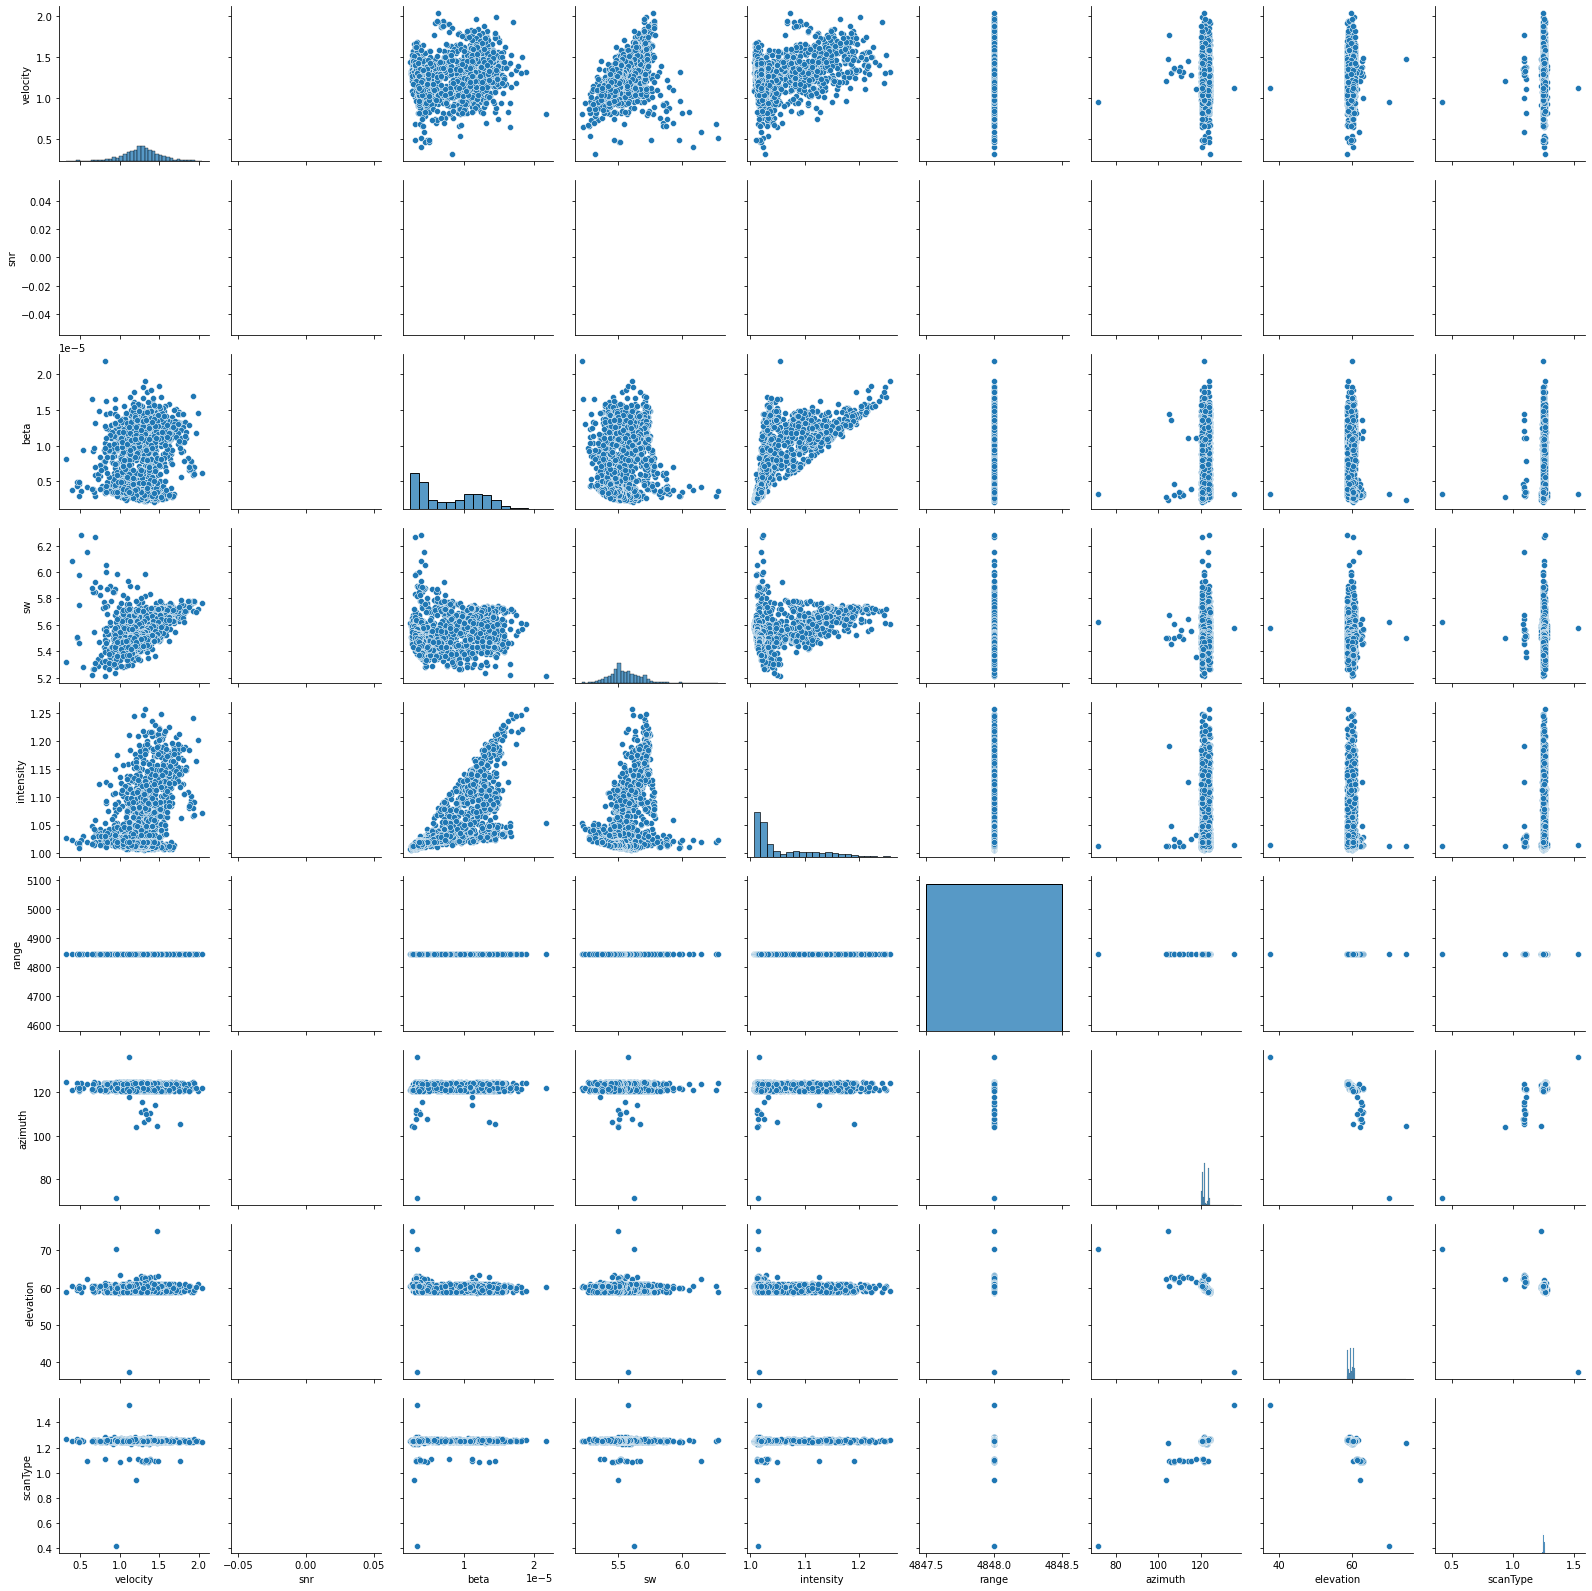

In [8]:
sns.pairplot(DF_)

In [9]:
DF_.corr()

,velocity,snr,beta,sw,intensity,range,azimuth,elevation,scanType
velocity,1.000000,NaN,0.160098,0.397158,0.415786,NaN,-0.002427,0.008308,0.017624
snr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beta,0.160098,NaN,1.000000,0.120624,0.765390,NaN,0.047013,-0.037809,0.031730
sw,0.397158,NaN,0.120624,1.000000,0.447879,NaN,-0.010407,0.000925,-0.025766
intensity,0.415786,NaN,0.765390,0.447879,1.000000,NaN,0.017210,-0.013888,0.022891
range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
azimuth,-0.002427,NaN,0.047013,-0.010407,0.017210,NaN,1.000000,-0.772221,0.796192
elevation,0.008308,NaN,-0.037809,0.000925,-0.013888,NaN,-0.772221,1.000000,-0.562747
scanType,0.017624,NaN,0.031730,-0.025766,0.022891,NaN,0.796192,-0.562747,1.000000


In [12]:
DF_.range

yDay
130 days 15:06:51.239980800    4848.0
130 days 15:26:51.239980800    4848.0
130 days 15:46:51.239980800    4848.0
130 days 16:06:51.239980800    4848.0
130 days 16:26:51.239980800    4848.0
                                ...  
151 days 22:20:19.129996800    4848.0
151 days 22:40:19.129996800    4848.0
151 days 23:00:19.129996800    4848.0
151 days 23:20:19.129996800    4848.0
151 days 23:40:19.129996800    4848.0
Name: range, Length: 1539, dtype: float64

In [10]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [16]:
preprocessor = Pipeline([("scaler",  StandardScaler()), ("pca", PCA(n_components=2, random_state=42)),])

In [17]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=10,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [21]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [19]:
DF_[DF_.columns[1:].values]

,snr,beta,sw,intensity,range,azimuth,elevation,scanType
yDay,,,,,,,,
130 days 15:06:51.239980800,NaN,0.000003,5.625839,1.013380,4848.0,71.671239,70.373311,0.419689
130 days 15:26:51.239980800,NaN,0.000003,5.620451,1.013610,4848.0,121.692867,60.207508,1.250119
130 days 15:46:51.239980800,NaN,0.000003,5.600992,1.013493,4848.0,123.018116,59.991178,1.232237
130 days 16:06:51.239980800,NaN,0.000003,5.597394,1.012629,4848.0,121.847060,59.453111,1.280303
130 days 16:26:51.239980800,NaN,0.000003,5.577424,1.014786,4848.0,135.700840,37.465658,1.536437
...,...,...,...,...,...,...,...,...
151 days 22:20:19.129996800,NaN,0.000006,5.363170,1.020554,4848.0,121.629654,59.765721,1.251442
151 days 22:40:19.129996800,NaN,0.000007,5.369308,1.024027,4848.0,120.721217,60.499124,1.253041
151 days 23:00:19.129996800,NaN,0.000006,5.333866,1.020630,4848.0,123.568791,58.924796,1.263309


In [23]:
DF_.isna().sum()

velocity        0
snr          1539
beta            0
sw              0
intensity       0
range           0
azimuth         0
elevation       0
scanType        0
dtype: int64

In [24]:
len(DF_)

1539

In [27]:
pipe.fit(df[df.columns[1:]])

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[timedelta64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=11)

In [13]:
import matplotlib.pyplot as plt


In [15]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42 )

In [16]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [23]:
#kmeans = KMeans(init="random", n_clusters=3,n_init=10,max_iter=300,random_state=42)
sse = []
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [50]:
p3 = "/Users/jenifervivar/Desktop/HALO_DATA/may 2022_level1_data/"
#snr =[]
#vel = []

df = pd.DataFrame()
for file in sorted(os.listdir(p3)):
    
    data = nc.Dataset(p3+file)
    
    snr_ = np.array(data.variables['snr'][:])
    vel_ = np.array(data.variables["velocity"][:])
    #"date in terms of matlab days"
    time_ = data.variables[ "decTime"][:]
    print(type(time_[0]), time_, time_2)
    time_2 = data.variables["yDay"][:]
    t_2= pd.to_datetime(time_2, unit='D', origin=pd.Timestamp('2022-01-01'))
    t = pd.to_datetime(time_-719529, unit='D')
    print(t, t_2)
    
    df0 = pd.DataFrame(snr_, index = t_2)
    df1 = pd.DataFrame(vel_, index=t_2)
    df_ = pd.concat([df0,df1], axis = 1)
    #print(df_)
    df = pd.concat([df, df_], axis = 0)
    break

<class 'numpy.float64'> [738651.62975972 738651.62976771 738651.62977442 ... 738651.99998368
 738651.99999005 738651.99999641] [130.62975972 130.62976771 130.62977442 ... 130.99998368 130.99999005
 130.99999641]
DatetimeIndex(['2022-05-10 15:06:51.239984384',
               '2022-05-10 15:06:51.930002688',
               '2022-05-10 15:06:52.509993472',
               '2022-05-10 15:06:53.060000512',
               '2022-05-10 15:06:53.619985408',
               '2022-05-10 15:06:54.200016384',
               '2022-05-10 15:06:54.780007424',
               '2022-05-10 15:06:55.339992320',
               '2022-05-10 15:06:55.900007168',
               '2022-05-10 15:06:56.459992064',
               ...
               '2022-05-10 23:59:54.729992448',
               '2022-05-10 23:59:55.279999488',
               '2022-05-10 23:59:55.830016512',
               '2022-05-10 23:59:56.379983360',
               '2022-05-10 23:59:56.929990400',
               '2022-05-10 23:59:57.479997696',
 

/var/folders/sk/km6c1g654036cmvl40zycd0m0000gn/T/ipykernel_968/199699246.py:10: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  snr_ = np.array(data.variables['snr'][:])
/var/folders/sk/km6c1g654036cmvl40zycd0m0000gn/T/ipykernel_968/199699246.py:11: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  vel_ = np.array(data.variables["velocity"][:])


In [10]:
df2  = df[df.index >"2022-05-10 23:49:59.999995648"]

In [11]:
type(df2)

pandas.core.frame.DataFrame

In [12]:
DF = df2.resample("20T").mean()
DF

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2022-05-11 15:00:00,-9.116675,-7.496765,-7.947219,-8.325778,-8.778670,-9.070589,-9.454467,-9.933974,-10.301895,-10.596988,...,2.159773,2.486380,1.706939,2.155910,2.132720,1.606885,1.806221,2.006973,1.937035,1.995859
2022-05-11 15:20:00,-8.870527,-7.281240,-7.686106,-8.058678,-8.491413,-8.831867,-9.235441,-9.752724,-10.118859,-10.433454,...,2.249197,2.035030,2.246077,1.817975,2.226385,1.927174,2.037970,2.135443,1.817103,1.425498
2022-05-11 15:40:00,-8.533135,-7.434842,-7.888525,-8.269063,-8.708438,-9.043803,-9.465308,-9.971788,-10.342398,-10.647854,...,2.035242,1.834708,1.869710,1.469823,1.964454,1.655528,1.489615,1.861461,1.928888,1.917946
2022-05-11 16:00:00,-10.584929,-7.198228,-7.614230,-8.161741,-8.698550,-9.102116,-9.552840,-10.019051,-10.562078,-10.819692,...,2.023440,1.367206,2.378178,1.713559,1.836002,2.072140,1.772411,1.783257,2.270298,2.055737
2022-05-11 16:20:00,-10.425506,-7.276790,-7.606747,-8.040297,-8.492551,-8.861862,-9.320423,-9.781157,-10.325245,-10.581774,...,1.461161,2.541873,2.094082,2.216590,1.811392,1.789838,1.665185,2.006007,2.045319,1.529052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01 22:20:00,-10.452433,-7.084633,-7.240509,-7.537449,-7.915664,-8.286367,-8.559286,-8.939456,-9.405148,-9.732335,...,1.844154,1.197732,1.557702,1.386666,1.559301,1.494143,1.509487,1.986672,1.831383,2.025940
2022-06-01 22:40:00,-10.094377,-6.640872,-6.778886,-7.046485,-7.404620,-7.780837,-8.091544,-8.464269,-8.931214,-9.274361,...,2.231459,2.127328,2.532232,1.572064,1.485847,1.932175,2.009940,1.878858,1.966088,2.012482
2022-06-01 23:00:00,-8.262529,-6.333665,-6.623227,-6.879229,-7.221659,-7.668732,-7.984121,-8.302646,-8.740703,-9.066414,...,1.200464,0.754003,1.293626,1.284646,0.958622,1.113706,1.156040,1.253405,1.318847,1.522652
2022-06-01 23:20:00,-8.567128,-6.468805,-6.711158,-6.891853,-7.155173,-7.569891,-7.850189,-8.132648,-8.554715,-8.872335,...,1.696757,2.043997,1.526356,2.426388,2.210089,1.727707,1.620038,1.512186,1.317847,0.936292


In [13]:
len(DF)

1539

In [14]:
path = "/Users/jenifervivar/Desktop/HALO_DATA/May_2022HALO_data/"

for file in os.listdir(path):
    
    if file != ".DS_Store":
        
        data = nc.Dataset(path + file , mode="r")  # this will open the netCDF data
        print(data.variables)
    

{'version': <class 'netCDF4._netCDF4.Variable'>
float64 version(year)
    units: arb
    variableName: Version
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'year': <class 'netCDF4._netCDF4.Variable'>
float64 year(Ncols)
    units: year
    variableName: Year
unlimited dimensions: 
current shape = (1532,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'yDay': <class 'netCDF4._netCDF4.Variable'>
float64 yDay(Ncols)
    units: decimal day
    variableName: Decimal Day of the Year
unlimited dimensions: 
current shape = (1532,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float64 latitude(Ncols)
    units: decimal degrees
    variableName: Latitude
unlimited dimensions: 
current shape = (1532,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float64 longitude(Ncols)
    units: decimal degre